<a href="https://colab.research.google.com/github/akselea/Car-Prediction-ML/blob/main/Car-Price-Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Submission Dicoding - Predictive Analysis
##### Nama : Aksel Estevannanda Arianto
##### Dataset diambil dari Kaggle 
###### **Car Prices Poland** - https://www.kaggle.com/datasets/ravishah1/carvana-predict-car-prices

### Import Library yang Digunakan:

In [ ]:
# Memasukan library yang dibutuhkan dalam membangun model
import pathlib
import os
from google.colab import files

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Mengunduh Dataset dari Kaggle:

In [ ]:
# Install terlebih dahulu Library untuk mengakses Kaggle
! pip install -q kaggle

In [ ]:
# Memasukkan API Token Kaggle
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"akselestevannandaa","key":"72167085ecc204832f209a6ca813368d"}'}

In [ ]:
# Membuat direktori untuk menyimpan dataset dari Kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [ ]:
# Memberi instruksi agar file yang diunduh dapat dimodifikasi hanya oleh yang memiliki API Token saja
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Mengunduh dataset dari Kaggle sesuai dengan URL yang telah dimasukkan
! kaggle datasets download aleksandrglotov/car-prices-poland -p /content/dataset/ --unzip

  0% 0.00/1.64M [00:00<?, ?B/s]
100% 1.64M/1.64M [00:00<00:00, 133MB/s]


In [ ]:
# Memasukan Dataset dari Kaggle dengan variabel "df"
df = pd.read_csv('/content/dataset/Car_Prices_Poland_Kaggle.csv')
df.head()

,Unnamed: 0,mark,model,generation_name,year,mileage,vol_engine,fuel,city,province,price
0,0,opel,combo,gen-d-2011,2015,139568,1248,Diesel,Janki,Mazowieckie,35900
1,1,opel,combo,gen-d-2011,2018,31991,1499,Diesel,Katowice,Śląskie,78501
2,2,opel,combo,gen-d-2011,2015,278437,1598,Diesel,Brzeg,Opolskie,27000
3,3,opel,combo,gen-d-2011,2016,47600,1248,Diesel,Korfantów,Opolskie,30800
4,4,opel,combo,gen-d-2011,2014,103000,1400,CNG,Tarnowskie Góry,Śląskie,35900


### Mencari Info Dataset:

In [ ]:
# Mencari info terkait isi dari Dataset (Jumlah kolom dan jumlah data yang ada)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117927 entries, 0 to 117926
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Unnamed: 0       117927 non-null  int64 
 1   mark             117927 non-null  object
 2   model            117927 non-null  object
 3   generation_name  87842 non-null   object
 4   year             117927 non-null  int64 
 5   mileage          117927 non-null  int64 
 6   vol_engine       117927 non-null  int64 
 7   fuel             117927 non-null  object
 8   city             117927 non-null  object
 9   province         117927 non-null  object
 10  price            117927 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 9.9+ MB


In [ ]:
# Mengecek apakah ada nilai kosong atau NaN pada Dataset 
df.isnull().sum()

Unnamed: 0             0
mark                   0
model                  0
generation_name    30085
year                   0
mileage                0
vol_engine             0
fuel                   0
city                   0
province               0
price                  0
dtype: int64

In [ ]:
# Untuk Kolom Numerik, Kolom "0" akan dihapus karena tidak berkaitan dengan harga mobil.
# Untuk Kolom Kategori, Kolom "generation_name" akan dihapus juga dikarenakan banyaknya data yang kosong dan tidak berkaitan dengan harga mobil.
# Unutk Kolom "model" pun akan dihapus dikarenakan sudah adanya data Tahun dan Volume Mesin yang lebih berpengaruh terhadap harga mobil.
df = df.drop(["Unnamed: 0", "generation_name", "model"], axis=1)

In [ ]:
# Mencari nilai parameter statistika pada Dataset
df.describe()

,year,mileage,vol_engine,price
count,117927.000000,1.179270e+05,117927.000000,1.179270e+05
mean,2012.925259,1.409768e+05,1812.057782,7.029988e+04
std,5.690135,9.236936e+04,643.613438,8.482458e+04
min,1945.000000,0.000000e+00,0.000000,5.000000e+02
25%,2009.000000,6.700000e+04,1461.000000,2.100000e+04
50%,2013.000000,1.462690e+05,1796.000000,4.190000e+04
75%,2018.000000,2.030000e+05,1995.000000,8.360000e+04
max,2022.000000,2.800000e+06,7600.000000,2.399900e+06


In [ ]:
# Berdasarkan parameter statistika di atas, pada kolom "vol_engine" nilai 0 merupakan nilai terendah.
# Memastikan terdapat beberapa data dengan nilai "vol_engine" = 0
vol_0 = (df.vol_engine == 0).sum()
print("Data dengan Volume Mesin 0 =", vol_0)

Data dengan Volume Mesin 0 = 1248


In [ ]:
# Menghapus Data dimana "vol_engine" < 999cc (Dibuat Threshold Nilai Minimum Volume Mesin di 999cc).
df = df.loc[(df[['vol_engine']]>998).all(axis=1)]
df.shape

(114449, 8)

In [ ]:
# Mengecek kembali nilai "vol_engine" dengan fungsi .describe()
df.describe()

,year,mileage,vol_engine,price
count,114449.000000,1.144490e+05,114449.000000,1.144490e+05
mean,2012.802453,1.436322e+05,1848.205926,6.936098e+04
std,5.648268,9.181119e+04,613.058197,8.389575e+04
min,1952.000000,1.000000e+00,999.000000,5.000000e+02
25%,2009.000000,7.200000e+04,1498.000000,2.090000e+04
50%,2013.000000,1.492520e+05,1798.000000,4.150000e+04
75%,2017.000000,2.050000e+05,1995.000000,8.225000e+04
max,2022.000000,2.800000e+06,7600.000000,2.399900e+06


### Univariate Analysis:

In [ ]:
# Mengecek info Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114449 entries, 0 to 117926
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   mark        114449 non-null  object
 1   year        114449 non-null  int64 
 2   mileage     114449 non-null  int64 
 3   vol_engine  114449 non-null  int64 
 4   fuel        114449 non-null  object
 5   city        114449 non-null  object
 6   province    114449 non-null  object
 7   price       114449 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 7.9+ MB


In [ ]:
# Membagi Data berdasarkan Jenisnya (Numerical & Categorical).
numerical_data = ['year', 'mileage', 'vol_engine', 'price']
categorical_data = ['mark', 'fuel', 'city', 'province']

               Jumlah Sampel  Persentase
audi                   11825        10.3
opel                   11700        10.2
bmw                    10863         9.5
volkswagen             10730         9.4
ford                    9130         8.0
mercedes-benz           7033         6.1
renault                 6524         5.7
skoda                   5810         5.1
peugeot                 5004         4.4
toyota                  4491         3.9
volvo                   4374         3.8
hyundai                 3792         3.3
kia                     3460         3.0
nissan                  2976         2.6
mazda                   2846         2.5
seat                    2835         2.5
fiat                    2720         2.4
citroen                 2719         2.4
honda                   2133         1.9
mitsubishi              1113         1.0
mini                    1064         0.9
alfa-romeo               699         0.6
chevrolet                608         0.5


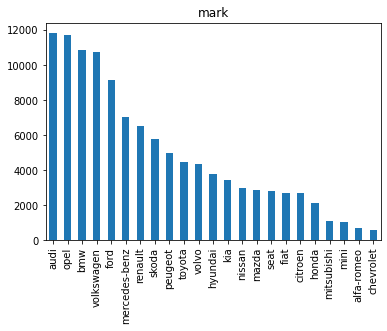

In [ ]:
# Categorical - mark
feature = categorical_data[0]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df_cat = pd.DataFrame({'Jumlah Sampel':count, 'Persentase':percent.round(1)})
print(df_cat)
count.plot(kind='bar', title=feature)

          Jumlah Sampel  Persentase
Gasoline          59270        51.8
Diesel            48327        42.2
LPG                4240         3.7
Hybrid             2561         2.2
CNG                  46         0.0
Electric              5         0.0


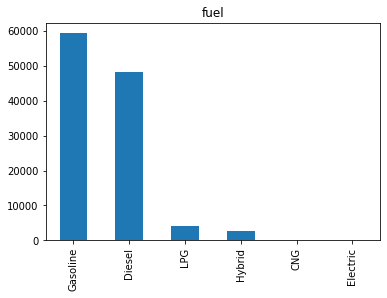

In [ ]:
# Categorical - fuel
feature = categorical_data[1]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df_cat = pd.DataFrame({'Jumlah Sampel':count, 'Persentase':percent.round(1)})
print(df_cat)
count.plot(kind='bar', title=feature)

          Jumlah Sampel  Persentase
Gasoline          59270        55.1
Diesel            48327        44.9


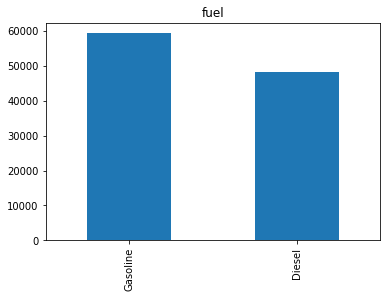

In [ ]:
# Dengan melihat pemerataan data, maka Jenis Bahan Bakar selain Gasoline dan Diesel akan dihapus.
df = df.loc[df['fuel'].isin(count.index[count > 5000])]

feature = categorical_data[1]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df_cat = pd.DataFrame({'Jumlah Sampel':count, 'Persentase':percent.round(1)})
print(df_cat)
count.plot(kind='bar', title=feature)

             Jumlah Sampel  Persentase
Warszawa              7130         6.6
Łódź                  2901         2.7
Kraków                2571         2.4
Wrocław               2462         2.3
Poznań                2086         1.9
...                    ...         ...
Czciradz                 1         0.0
Mirkowiczki              1         0.0
Lubogoszcz               1         0.0
Skałka                   1         0.0
Bledzew                  1         0.0

[4224 rows x 2 columns]


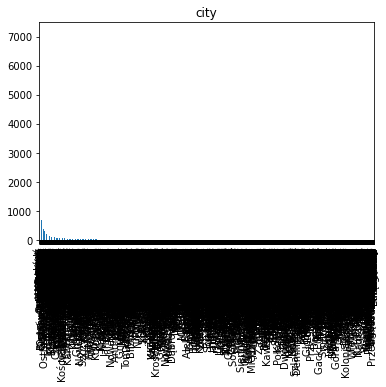

In [ ]:
# Categorical - city
feature = categorical_data[2]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df_cat = pd.DataFrame({'Jumlah Sampel':count, 'Persentase':percent.round(1)})
print(df_cat)
count.plot(kind='bar', title=feature)

In [ ]:
# Dikarenakan banyaknya jenis kota pada Dataset, bisa dianggap bahwa data kota digantikan dengan data provinsi yang ada.
df = df.drop(['city'], axis=1)

                          Jumlah Sampel  Persentase
Mazowieckie                       20335        18.9
Śląskie                           14929        13.9
Wielkopolskie                     12891        12.0
Małopolskie                        8829         8.2
Dolnośląskie                       8094         7.5
Łódzkie                            7105         6.6
Pomorskie                          7002         6.5
Kujawsko-pomorskie                 4907         4.6
Lubelskie                          4327         4.0
Zachodniopomorskie                 3658         3.4
Podkarpackie                       3224         3.0
Świętokrzyskie                     3106         2.9
Warmińsko-mazurskie                2767         2.6
Lubuskie                           2538         2.4
Podlaskie                          1928         1.8
Opolskie                           1914         1.8
Moravian-Silesian Region             35         0.0
Berlin                                3         0.0
Wiedeń      

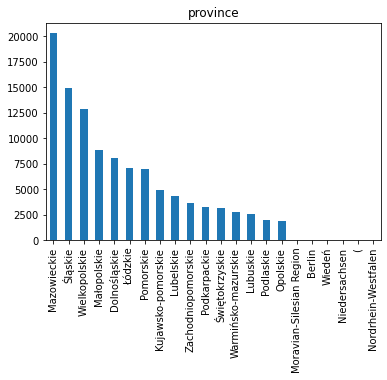

In [ ]:
# Categorical - province
feature = categorical_data[3]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df_cat = pd.DataFrame({'Jumlah Sampel':count, 'Persentase':percent.round(1)})
print(df_cat)
count.plot(kind='bar', title=feature)

                     Jumlah Sampel  Persentase
Mazowieckie                  20335        19.6
Śląskie                      14929        14.4
Wielkopolskie                12891        12.4
Małopolskie                   8829         8.5
Dolnośląskie                  8094         7.8
Łódzkie                       7105         6.9
Pomorskie                     7002         6.8
Kujawsko-pomorskie            4907         4.7
Lubelskie                     4327         4.2
Zachodniopomorskie            3658         3.5
Podkarpackie                  3224         3.1
Świętokrzyskie                3106         3.0
Warmińsko-mazurskie           2767         2.7
Lubuskie                      2538         2.4


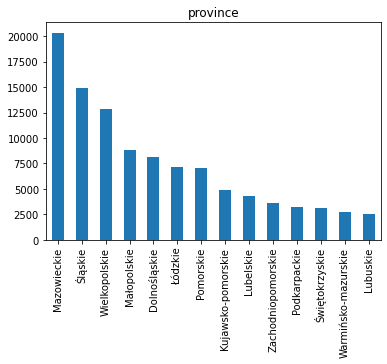

In [ ]:
# Dengan Melihat Pemerataan Data, maka Provinsi dengan Total Data < 2000 akan dihapus.
df = df.loc[df['province'].isin(count.index[count > 2000])]

feature = categorical_data[3]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df_cat = pd.DataFrame({'Jumlah Sampel':count, 'Persentase':percent.round(1)})
print(df_cat)
count.plot(kind='bar', title=feature)

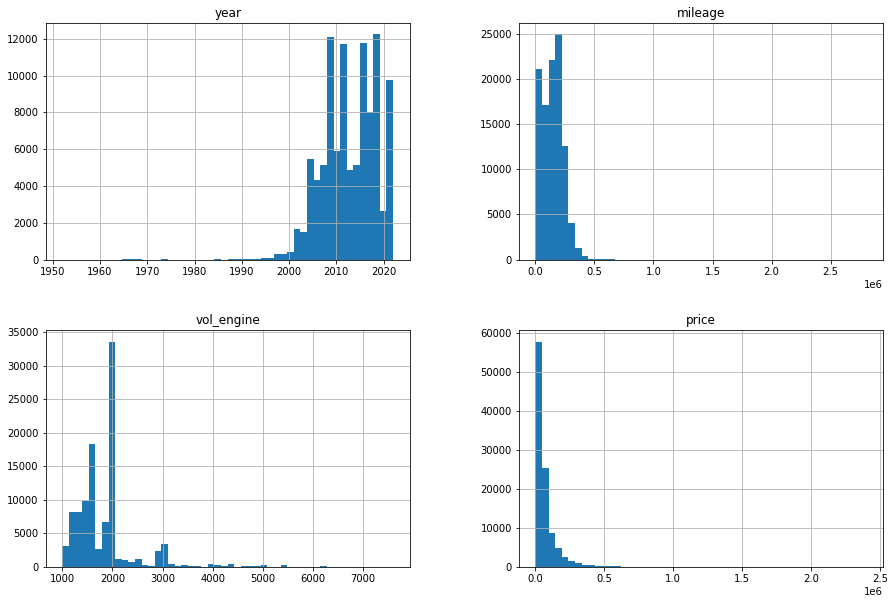

In [ ]:
# Numerical
df.hist(bins=50, figsize=(15, 10))
plt.show()

### Multivariate Analysis:

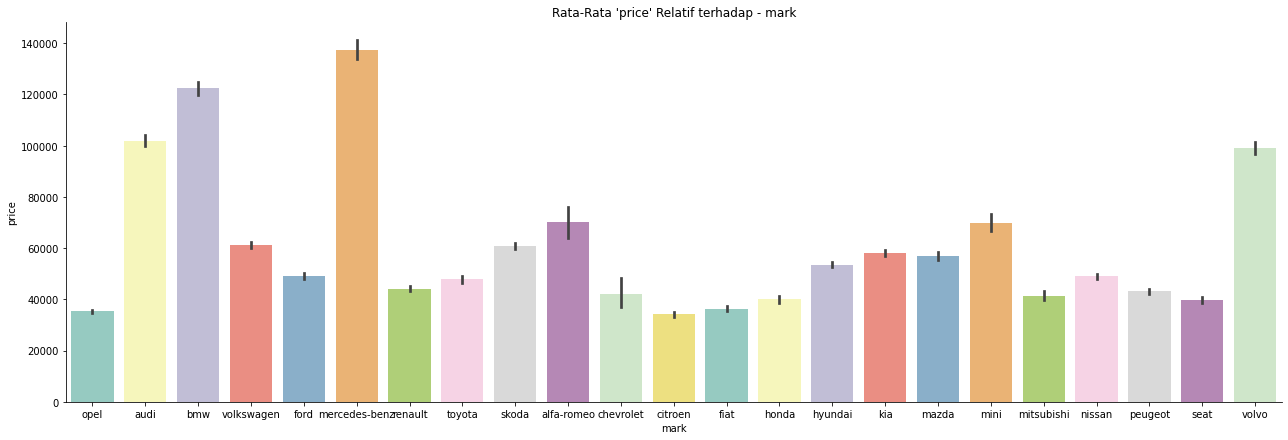

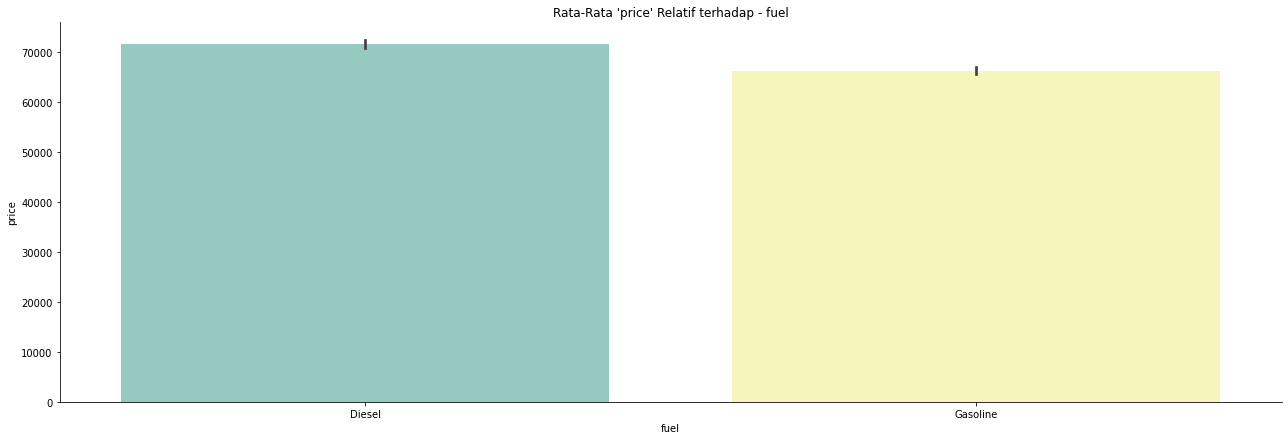

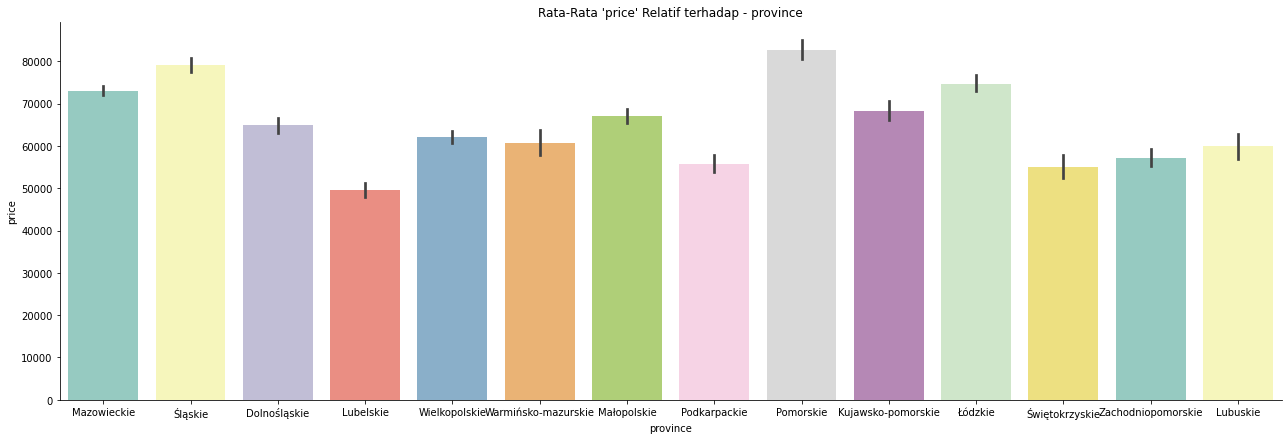

In [ ]:
# Categorical Data
cat_data = df.select_dtypes(include='object').columns.to_list()

for col in cat_data:
  sns.catplot(x=col, y='price', kind='bar', dodge=False, height=6, aspect=3, data=df, palette='Set3')
  plt.title("Rata-Rata 'price' Relatif terhadap - {}".format(col))

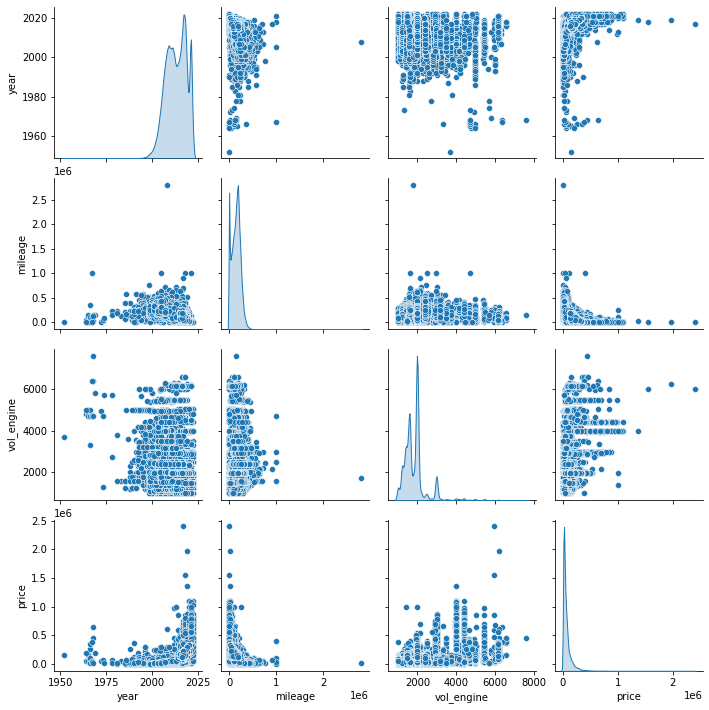

In [ ]:
# Numerical Data
sns.pairplot(df, diag_kind='kde')

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik')

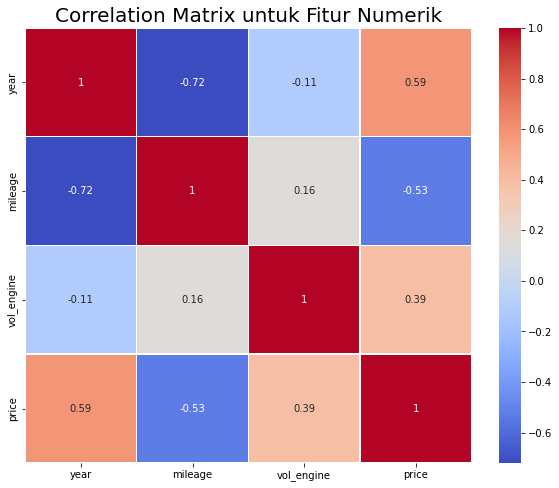

In [ ]:
# Melihat Heat Map untuk melihat korelasi antar data Numerical
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr().round(2)

sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix untuk Fitur Numerik", size=20)

### Data Preparation

In [ ]:
# Untuk data Categorical, diberlakukan sistem One-Hot Encoding untuk mengubah data Categorical menjadi data Numerical
df = pd.concat([df, pd.get_dummies(df['mark'], prefix='mark')], axis=1)
df = pd.concat([df, pd.get_dummies(df['fuel'], prefix='fuel')], axis=1)
df = pd.concat([df, pd.get_dummies(df['province'], prefix='province')], axis=1)
df.drop(['mark', 'fuel', 'province'], axis=1, inplace=True)
df.head()

,year,mileage,vol_engine,price,mark_alfa-romeo,mark_audi,mark_bmw,mark_chevrolet,mark_citroen,mark_fiat,...,province_Mazowieckie,province_Małopolskie,province_Podkarpackie,province_Pomorskie,province_Warmińsko-mazurskie,province_Wielkopolskie,province_Zachodniopomorskie,province_Łódzkie,province_Śląskie,province_Świętokrzyskie
0,2015,139568,1248,35900,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,2018,31991,1499,78501,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,2017,121203,1598,51900,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
6,2017,119965,1248,44700,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,2016,201658,1248,29000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Train-Test Split:

In [ ]:
# Membagi Dataset menjadi Data Latih dan Data Validasi menggunakan fungsi train_test_split dengan perbandingan 90:10
X = df.drop(['price'], axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)

print(f'Total Sample in Whole Dataset: {len(X)}')
print(f'Total Sample in Train Dataset: {len(X_train)}')
print(f'Total Sample in Test Dataset: {len(X_test)}')

Total Sample in Whole Dataset: 103712
Total Sample in Train Dataset: 93340
Total Sample in Test Dataset: 10372


### Normalisasi Data:

In [ ]:
# Menormalisasi Data agar lebih seragam dan lebih mudah dipelajari oleh model
numerical_features = ['year', 'mileage', 'vol_engine']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,year,mileage,vol_engine
49474,-0.326112,0.123207,-0.406705
23048,0.936249,-0.748958,1.851780
83167,-1.047461,0.557094,0.253873
31406,1.477261,-1.591134,0.255520
108212,-1.227799,1.123924,0.253873


In [ ]:
# Mengecek hasil normalisasi yang telah dilakukan, ditandai dengan nilai "mean" = 0 dan standar deviasi = 1
X_train[numerical_features].describe().round(4)

,year,mileage,vol_engine
count,93340.0000,93340.0000,93340.0000
mean,-0.0000,0.0000,-0.0000
std,1.0000,1.0000,1.0000
min,-8.8020,-1.5912,-1.3902
25%,-0.6868,-0.7711,-0.5681
50%,0.0346,0.0600,-0.0772
75%,0.7559,0.6592,0.2506
max,1.6576,29.4388,7.8233


### Model Development:

In [ ]:
# Mempersiapkan Dataframe
models = pd.DataFrame(index=['train_mse', 'test_mse'], columns=['KNN', 'RandomForest', 'Boosting'])

In [ ]:
# K-Nearest Neighbor
knn = KNeighborsRegressor(n_neighbors=4)
knn.fit(X_train, y_train)

models.loc['train_mse', 'KNN'] = mean_squared_error(y_pred=knn.predict(X_train), y_true=y_train)

In [ ]:
# Random Forest
RF = RandomForestRegressor(n_estimators=50, max_depth=64, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)

models.loc['train_mse', 'RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)

In [ ]:
# Boosting Algorithm
boosting = AdaBoostRegressor(learning_rate=0.08, random_state=55)
boosting.fit(X_train, y_train)

models.loc['train_mse', 'Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

### Evaluasi Model:

In [ ]:
# Scaling Data Uji
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

In [ ]:
# Melihat Hasil Prediksi Model
mse = pd.DataFrame(columns=['Train', 'Test'], index=['K-Nearest Neighbor', 'Random Forest', 'Boosting'])
model_dict = {"K-Nearest Neighbor":knn, "Random Forest":RF, "Boosting":boosting}

for name, model in model_dict.items():
  mse.loc[name, 'Train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3
  mse.loc[name, 'Test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3

mse

,Train,Test
K-Nearest Neighbor,520014.135924,732296.875684
Random Forest,184651.209957,589524.177038
Boosting,1838754.256309,1703197.195434


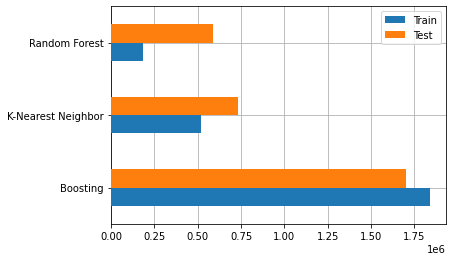

In [ ]:
# Membuat grafik untuk melihat nilai error pada data train dan data test
fig, ax = plt.subplots()
mse.sort_values(by='Test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

In [ ]:
# Menguji algoritma yang digunakan dengan memprediksi nilai asli(y_true)
prediksi = X_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}

for name, model in model_dict.items():
  pred_dict['Prediksi '+name] = model.predict(prediksi).round(1)

pd.DataFrame(pred_dict)

,y_true,Prediksi K-Nearest Neighbor,Prediksi Random Forest,Prediksi Boosting
30695,76000,51625.0,52459.8,78337.3
